## Pattern recognition - 3 class 

## Data Prep

In [33]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

from glob import glob
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dropout,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
# file_list = []
# class_list = []

In [90]:
base_dir = 'C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

list_of_patterns = ['solid', 'stripes', 'floral']
train_dirs=[]
test_dirs=[]
train_filenames=[]

In [95]:
# Directory with our training images
for i in range(len(list_of_patterns)):
    a = 'train_'+list_of_patterns[i]+'_dir' 
    train_dirs.append(a)
    
    b = "test_"+list_of_patterns[i]+'_dir' 
    test_dirs.append(b)
    
    c = 'train_'+list_of_patterns[i]+'_dir' 
    train_filenames.append(c)
    
for i in range(len(list_of_patterns)):
    vars()[train_dirs[i]] = os.path.join(train_dir, list_of_patterns[i])
#     vars()[test_dirs[i]] = os.path.join(test_dir, list_of_patterns[i]) 

In [92]:
a

'train_floral_dir'

In [96]:
train_solid_fnames = os.listdir( train_solid_dir )
train_stripes_fnames = os.listdir( train_stripes_dir )
train_floral_fnames = os.listdir( train_floral_dir )


print(train_solid_fnames[:10])
print(train_stripes_fnames[:10])
print(train_floral_fnames[:10])


['full pants+men_s+solid+blue10.jpg', 'full pants+men_s+solid+blue12.jpg', 'full pants+men_s+solid+blue13.jpg', 'full pants+men_s+solid+blue15.jpg', 'full pants+men_s+solid+blue16.jpg', 'full pants+men_s+solid+blue18.jpg', 'full pants+men_s+solid+blue19.jpg', 'full pants+men_s+solid+blue2.jpg', 'full pants+men_s+solid+blue21.jpg', 'full pants+men_s+solid+blue22.jpg']
['bw+shirts+stripes1.jpg', 'bw+shirts+stripes10.jpg', 'bw+shirts+stripes11.jpg', 'bw+shirts+stripes12.jpg', 'bw+shirts+stripes13.jpg', 'bw+shirts+stripes14.jpg', 'bw+shirts+stripes16.jpg', 'bw+shirts+stripes18.jpg', 'bw+shirts+stripes19.jpg', 'bw+shirts+stripes2.jpg']
['.DS_Store', '02-a-black-tee-dark-floral-pants-and-black-lace-up-heels.jpg', '100074046_5K2_alt3_1920x2880-2.jpeg', '107c904dcc96f620ab91f506b38f14e9--fashion-today-floral-pants.jpg', '2015-Floral-Pants-For-Women-Street-Style-Trends-12.jpg', '2015-Floral-Pants-For-Women-Street-Style-Trends-14.jpg', '2015-Floral-Pants-For-Women-Street-Style-Trends-6.jpg', '45

In [43]:
print('total training stripes images :', len(os.listdir(      train_stripes_dir ) ))
print('total training floral images :', len(os.listdir(      train_floral_dir ) ))
print('total training solid images :', len(os.listdir(      train_solid_dir ) ))

# print('total test stripes images :', len(os.listdir( test_stripes_dir ) ))
# print('total test floral images :', len(os.listdir( test_floral_dots_dir ) ))

total training stripes images : 1678
total training floral images : 2001
total training solid images : 1916


## CNN 

In [48]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')]
    )

In [49]:
# Compile Model. 
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Data Pre-processing

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest',
      validation_split=0.2) 

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150, 150),
                                                    subset='training')     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  train_datagen.flow_from_directory(train_dir,
                                                         batch_size=20,
                                                         target_size = (150, 150),
                                                         subset='validation')


Found 4476 images belonging to 3 classes.
Found 1118 images belonging to 3 classes.


In [81]:
train_generator.labels

array([0, 0, 0, ..., 2, 2, 2])

In [51]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50)

Epoch 1/50
  3/224 [..............................] - ETA: 1:49 - loss: 1.9094 - accuracy: 0.2833

C:\Users\aish0\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


224/224 [==============================] - 191s 850ms/step - loss: 1.0168 - accuracy: 0.4736 - val_loss: 0.8455 - val_accuracy: 0.5447
Epoch 2/50
224/224 [==============================] - 149s 667ms/step - loss: 0.8357 - accuracy: 0.5690 - val_loss: 0.8004 - val_accuracy: 0.5116
Epoch 3/50
224/224 [==============================] - 147s 657ms/step - loss: 0.8066 - accuracy: 0.5820 - val_loss: 0.7635 - val_accuracy: 0.5394
Epoch 4/50
224/224 [==============================] - 150s 670ms/step - loss: 0.7803 - accuracy: 0.6021 - val_loss: 0.7650 - val_accuracy: 0.5143
Epoch 5/50
224/224 [==============================] - 144s 641ms/step - loss: 0.7592 - accuracy: 0.6151 - val_loss: 0.8307 - val_accuracy: 0.5027
Epoch 6/50
224/224 [==============================] - 12013s 54s/step - loss: 0.7660 - accuracy: 0.6101 - val_loss: 0.7535 - val_accuracy: 0.5277
Epoch 7/50
224/224 [==============================] - 129s 574ms/step - loss: 0.7234 - accuracy: 0.6483 - val_loss: 0.7642 - val_accura

In [52]:
# Save the entire model as a SavedModel.

model.save('C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/PR_AK_50ep') 

INFO:tensorflow:Assets written to: C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/PR_AK_50ep\assets


INFO:tensorflow:Assets written to: C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/PR_AK_50ep\assets


Text(0.5, 1.0, 'Training and validation loss')

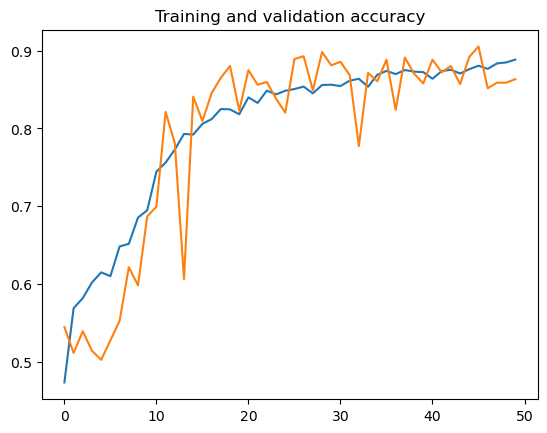

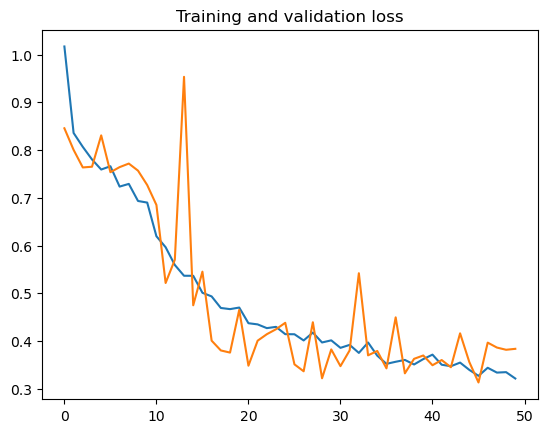

In [53]:
#-----------------------------------------------------------
# Retrieve a list of results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.

In [54]:
CNN_pattern = tf.keras.models.load_model('C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/PR_AK_50ep')

# Check its architecture
CNN_pattern.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [82]:
from keras.models import model_from_json
import numpy as np

class Patterndetection(object):

    patterns_list = ['floral', 'solid', 'stripes']

    def __init__(self, model_path):
        # load model 
        self.loaded_model= tf.keras.models.load_model(model_path)
    
        
    def predict_pattern(self, img):
        self.preds = self.loaded_model.predict(img)
        return Patterndetection.patterns_list[np.argmax(self.preds)]

In [83]:
model1= Patterndetection('C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/PR_AK_50ep')

In [84]:
def image_to_predict(imagepath):
    img_array = cv2.imread(imagepath)
    IMG_SIZE= 150
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    a= new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  
    return a

In [85]:
imagename = 'shirt+men+floral+pink84.jpg'

In [109]:
test_fnames = os.listdir(test_dir)

In [112]:
preds0=[]
for iname in test_fnames:
    imagepath = base_dir+'/test/'+ iname
    pred = model1.predict_pattern(image_to_predict(imagepath))
    print(pred)
    preds0.append(pred)
#     print(preds0)
    

1/1 [==============================] - 0s 21ms/step
stripes
1/1 [==============================] - 0s 18ms/step
solid
1/1 [==============================] - 0s 27ms/step
solid
1/1 [==============================] - 0s 22ms/step
stripes
1/1 [==============================] - 0s 16ms/step
stripes
1/1 [==============================] - 0s 17ms/step
stripes
1/1 [==============================] - 0s 29ms/step
stripes
1/1 [==============================] - 0s 16ms/step
floral
1/1 [==============================] - 0s 17ms/step
floral
1/1 [==============================] - 0s 18ms/step
floral
1/1 [==============================] - 0s 16ms/step
floral
1/1 [==============================] - 0s 17ms/step
floral
1/1 [==============================] - 0s 18ms/step
floral
1/1 [==============================] - 0s 19ms/step
floral
1/1 [==============================] - 0s 25ms/step
floral
1/1 [==============================] - 0s 18ms/step
floral
1/1 [==============================] - 0s 32ms/step
s

In [113]:
preds0

['stripes',
 'solid',
 'solid',
 'stripes',
 'stripes',
 'stripes',
 'stripes',
 'floral',
 'floral',
 'floral',
 'floral',
 'floral',
 'floral',
 'floral',
 'floral',
 'floral',
 'stripes',
 'stripes',
 'stripes']

In [99]:
print(test_fnames)

['bw+shirts+stripes20.jpg', 'full pants+men_s+solid+blue36.jpg', 'full pants+men_s+solid+light44.jpg', 'full pants+men_s+stripes30.jpg', 'full pants+women_s+stripes+blue1.jpg', 'full pants+women_s+stripes+green11.jpg', 'mens+shirts+in+stripes2.jpg', 'pant+men+floral+black57.jpg', 'pant+men+floral+color75.jpg', 'pants+wn+floral22.jpg', 'pants+wn80s+floral23.jpg', 'shirt+men+floral+brown112.jpg', 'shirt+men+floral+cyan34.jpg', 'shirt+men+floral+pink42.jpg', 'shirt+men+floral+pink84.jpg', 'shirt+men+floral+purple16.jpg', 'shirts+solidcolor+brown15.jpg', 'shirts+solidcolor+fuschia1.jpg', 'shirts+solidcolor+fuschia19.jpg']
